 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_df.shape
print(type(whale_df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)

In [6]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
whale_daily_returns = whale_df.pct_change()
whale_daily_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [8]:
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840


In [9]:
# Count nulls
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      15
PAULSON & CO.INC.              15
TIGER GLOBAL MANAGEMENT LLC    15
BERKSHIRE HATHAWAY INC         15
dtype: int64

In [10]:
# Drop nulls
whale_daily_returns.dropna(inplace=True)
whale_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672
...,...,...,...,...
2019-04-25,-1.124733,-2.279801,0.288325,-1.759149
2019-04-26,-29.607053,-8.097525,-3.397536,1.152302
2019-04-29,-0.846082,-0.703202,-0.494071,-0.499394


In [11]:
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources\sp500_history.csv")
sp500_df = pd.read_csv(sp500_history, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
# Check Data Types
sp500_df.columns
sp500_df.sort_index(inplace=True)
sp500_df['Close'].dtype

dtype('O')

In [14]:
print(sp500_df.shape)

(1649, 1)


In [28]:
sp500_df.set_index = 'Date'
sp500_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [25]:
sp500_df.columns

Index(['Close'], dtype='object')

In [26]:
sp500_df.describe

<bound method NDFrame.describe of               Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]>

In [29]:
sp500_df.head

<bound method NDFrame.head of               Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]>

In [ ]:
#Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$","")
sp500_df['Close'] = sp500_df['Close'].str.replace(",","")
sp500_df['Close'] = sp500_df['Close'].astype("float")
sp500_df

In [31]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [32]:
# Drop nulls
sp500_daily_returns.isnull().sum()
sp500_daily_returns.dropna(inplace=True)

In [33]:
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [34]:
print(type(sp500_daily_returns))
sp500_daily_returns.index
sp500_daily_returns.shape

<class 'pandas.core.frame.DataFrame'>


(1648, 1)

In [35]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close" : "SP500 Daily Return"})

In [36]:
sp500_daily_returns.head()

,SP500 Daily Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [37]:
algo_returns = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [38]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, sp500_daily_returns, algo_df], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500 Daily Return,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229


In [28]:
combined_df.to_excel("Resources/combined_df3.xls")

<ipython-input-28-4e3d635cf8f0>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  combined_df.to_excel("Resources/combined_df3.xls")


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

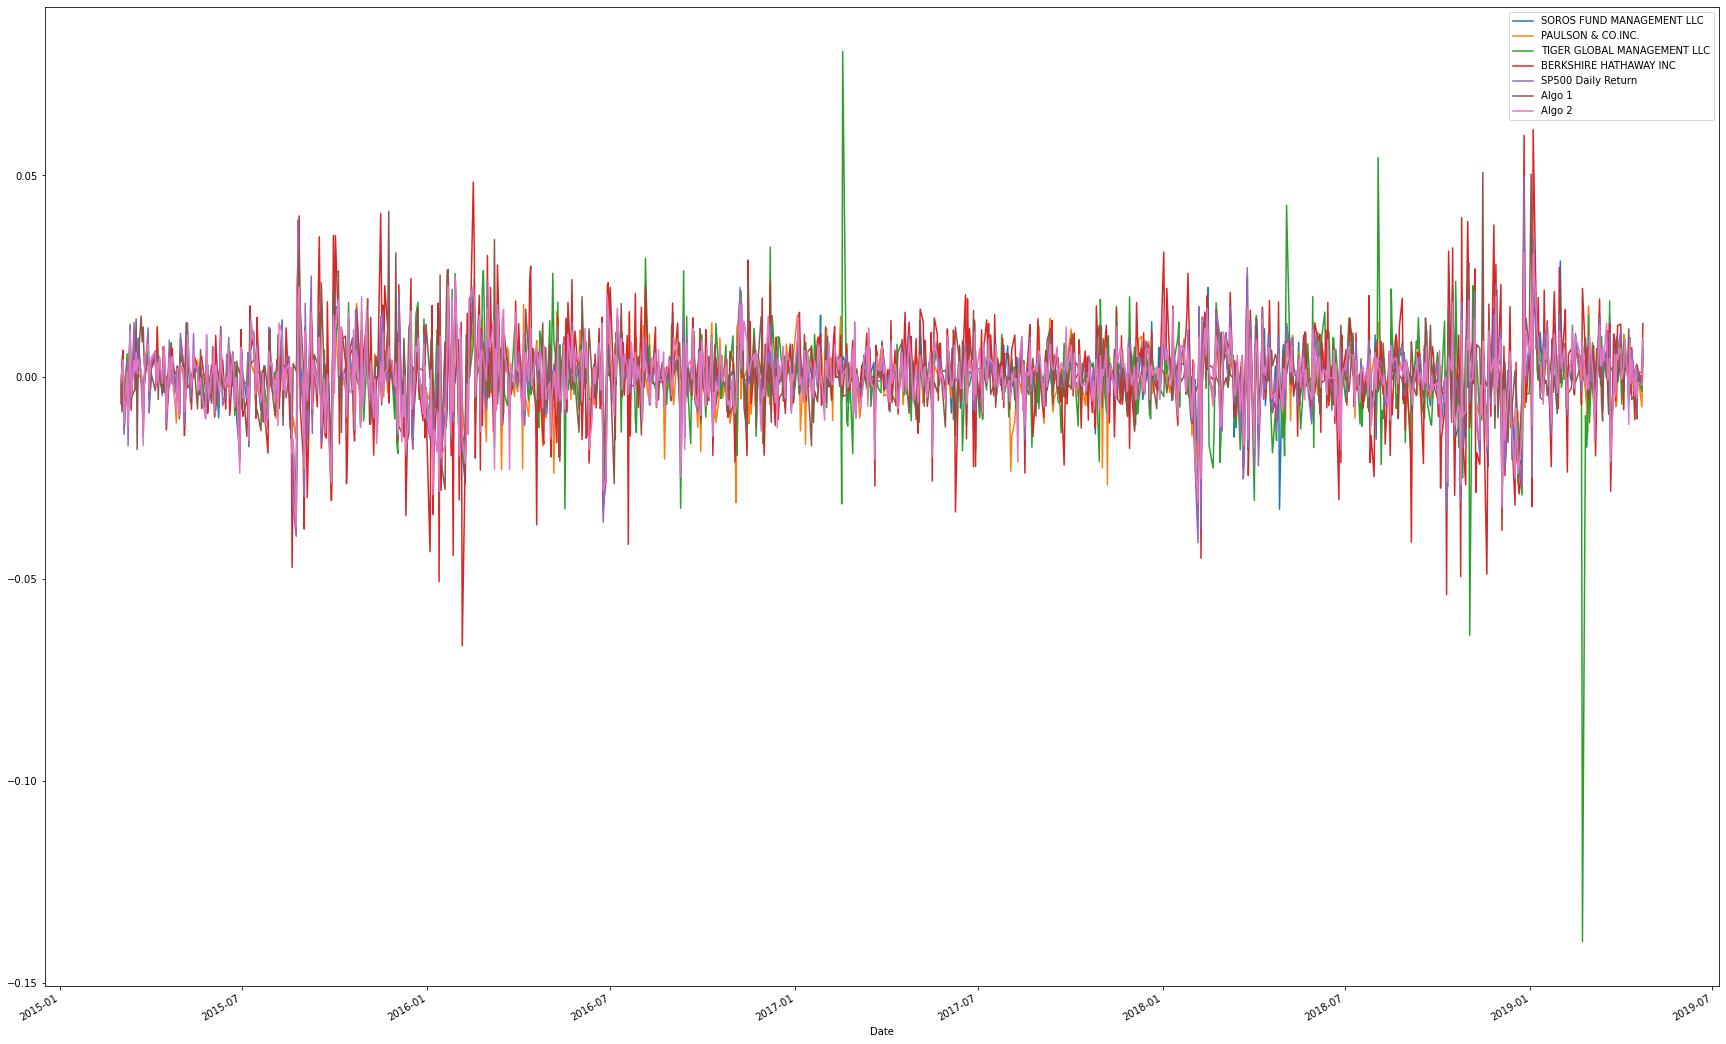

In [39]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (30,20))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

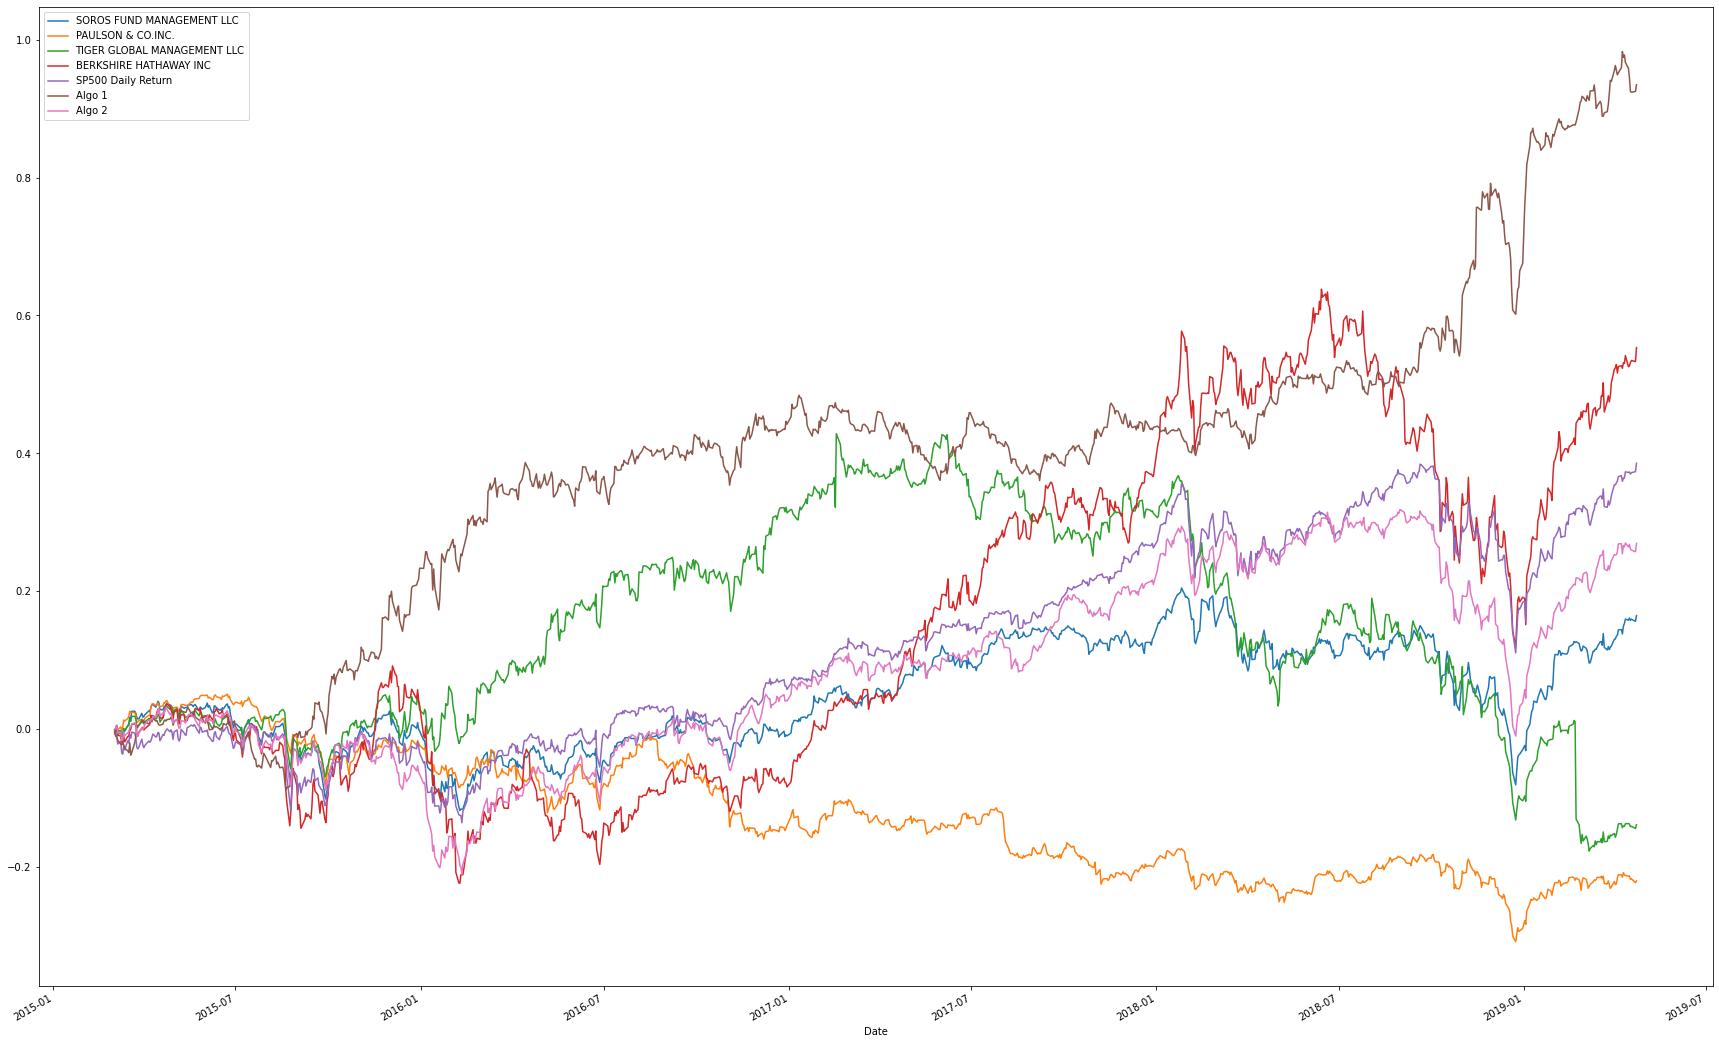

In [40]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize = (30,20))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

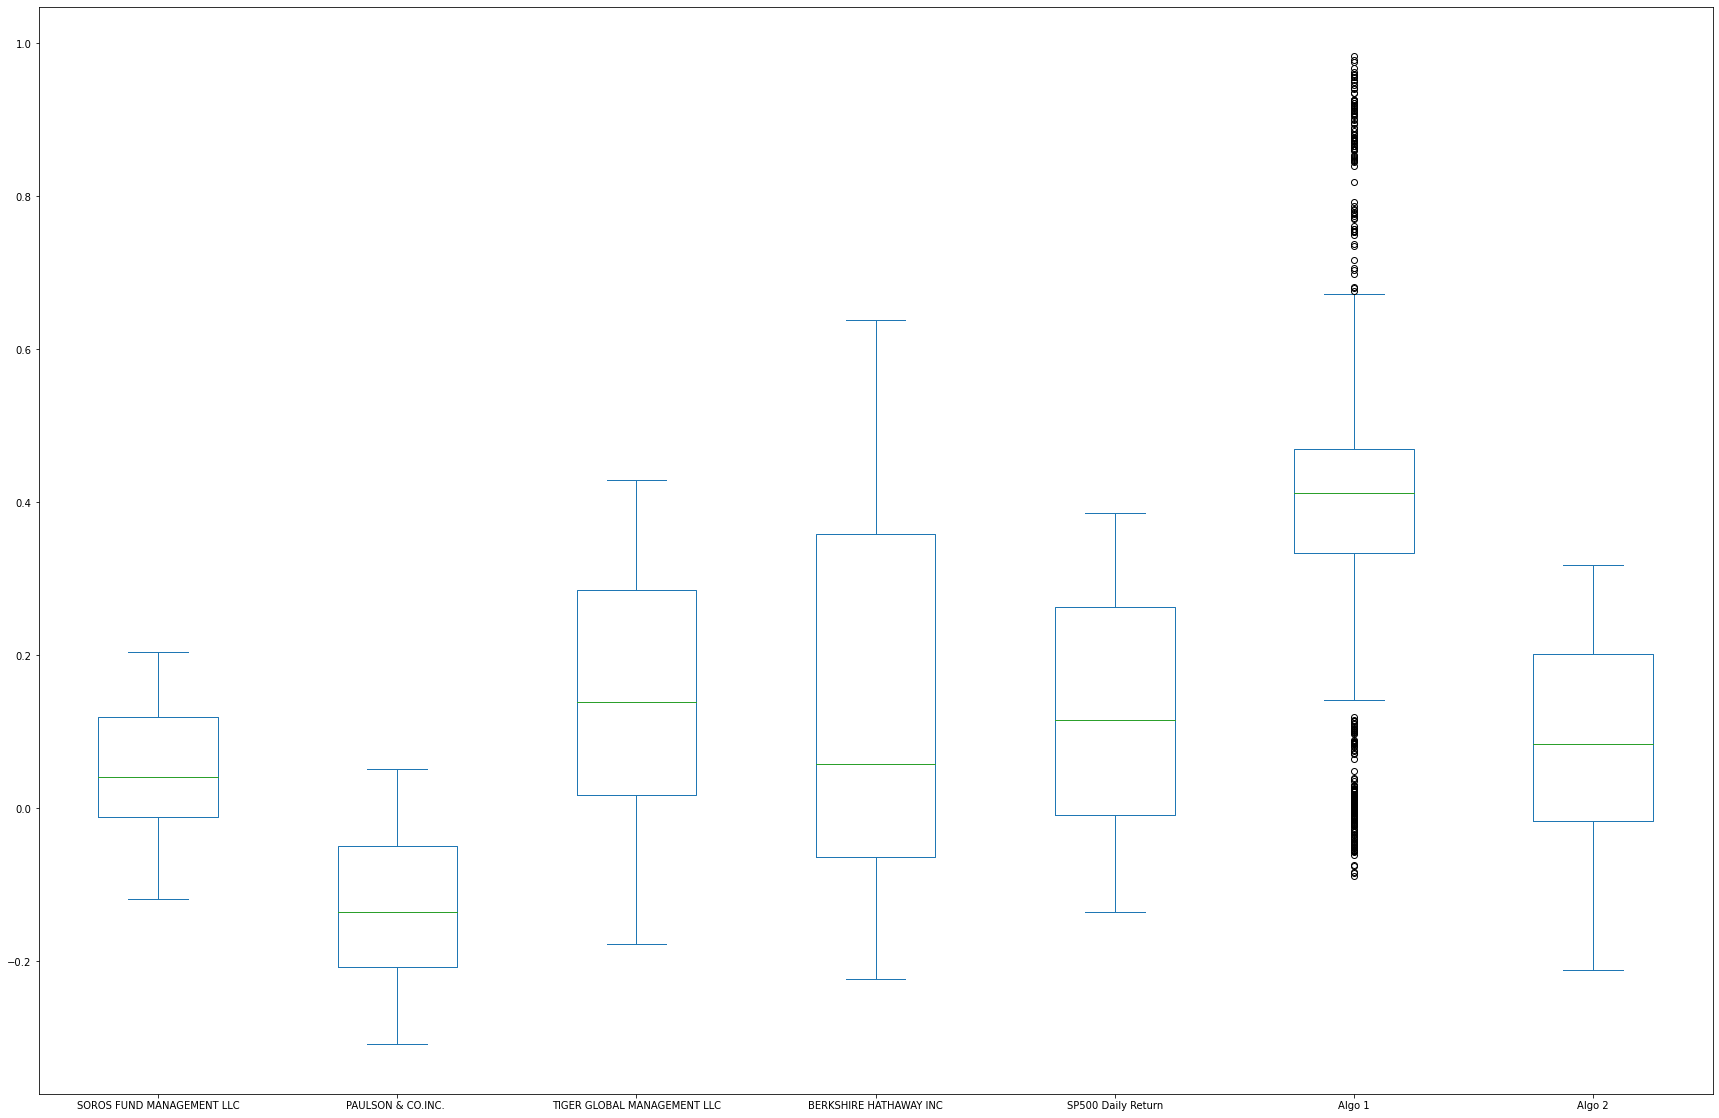

In [41]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize = (30,20))

### Calculate Standard Deviations

In [42]:
algo_std_dev = algo_df.std()
whale_std_dev = whale_df.std()
print(algo_std_dev,whale_std_dev)

Algo 1    0.007972
Algo 2    0.008466
dtype: float64 SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64


In [43]:
# Calculate the daily standard deviations of all portfolios
portfolio_std_dev = [algo_std_dev, whale_std_dev]
portfolio_std_dev

[Algo 1    0.007972
 Algo 2    0.008466
 dtype: float64,
 SOROS FUND MANAGEMENT LLC      0.007842
 PAULSON & CO.INC.              0.006977
 TIGER GLOBAL MANAGEMENT LLC    0.010824
 BERKSHIRE HATHAWAY INC         0.012831
 dtype: float64]

### Determine which portfolios are riskier than the S&P 500

In [44]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std_dev = sp500_daily_returns.std()
sp500_daily_std_dev
# Determine which portfolios are riskier than the S&P 500
df_portfolio_std_dev = pd.concat([algo_std_dev, whale_std_dev, sp500_daily_std_dev], axis="rows", join="outer")
#df_portfolio_std_dev = df_portfolio_std_dev.sort_values(
df_portfolio_std_dev.to_excel("Resources/portfolio_std_dev.xls")
  

C:\Users\matth\AppData\Local\Temp/ipykernel_8188/1488643005.py:7: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_portfolio_std_dev.to_excel("Resources/portfolio_std_dev.xls")


In [45]:
df_p_s_d = Path("Resources/portfolio_std_dev.csv")
df_portfolio_std_dev = pd.read_csv(df_p_s_d)
df_portfolio_std_dev.head(7)

,Unnamed: 0,Std_Dev
0,BERKSHIRE HATHAWAY INC,0.012831
1,TIGER GLOBAL MANAGEMENT LLC,0.010824
2,Algo 2,0.008466
3,SP500 Daily Return,0.008111
4,Algo 1,0.007972
5,SOROS FUND MANAGEMENT LLC,0.007842
6,PAULSON & CO.INC.,0.006977


### I know I'm supposed to have an 'if-else' statement here, but even though I'm able to use the comparison operator to find either a True or False value, when I try to print the result into an f-string, I'm getting a TypeError. I think this is related to the S&P 500 not being set up the same way as the portfolio data frames, but I don't understand why the comparison operator would work in the first place.

### I'll provide what the input WOULD look like if I was able to get past the Type Error in the cell below, but I won't run it:

In [ ]:
if (sp500_std_dev > algo_std_dev):
    print(f"{algo_std_dev} is less risky than the S&P 500")
elif:
    print(f"{algo_std_dev} is more risky than the S&P 500")
elif: (sp500_std_dev > whale_std_dev,(whale_std_dev < sp500_std_dev):
    print(f"{whale_std_dev} is less risky than the S&P 500")
else:
    print(f"{whale_std_dev} is more risky than the S&P 500")  

## Algo 1, Soros, and Paulson are all less volitile than the S&P 500
## Algo 2, Tiger, and BRK are all riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized standard deviation (252 trading days)
algo_annualized_std_dev = algo_std_dev * np.sqrt(252)
whale_annualized_std_dev = whale_std_dev * np.sqrt(252)
print(algo_annualized_std_dev)
print(whale_annualized_std_dev)

Algo 1    0.126558
Algo 2    0.134401
dtype: float64
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

(<AxesSubplot:xlabel='Date'>,
 <AxesSubplot:xlabel='Date'>,
 <AxesSubplot:xlabel='Date'>)

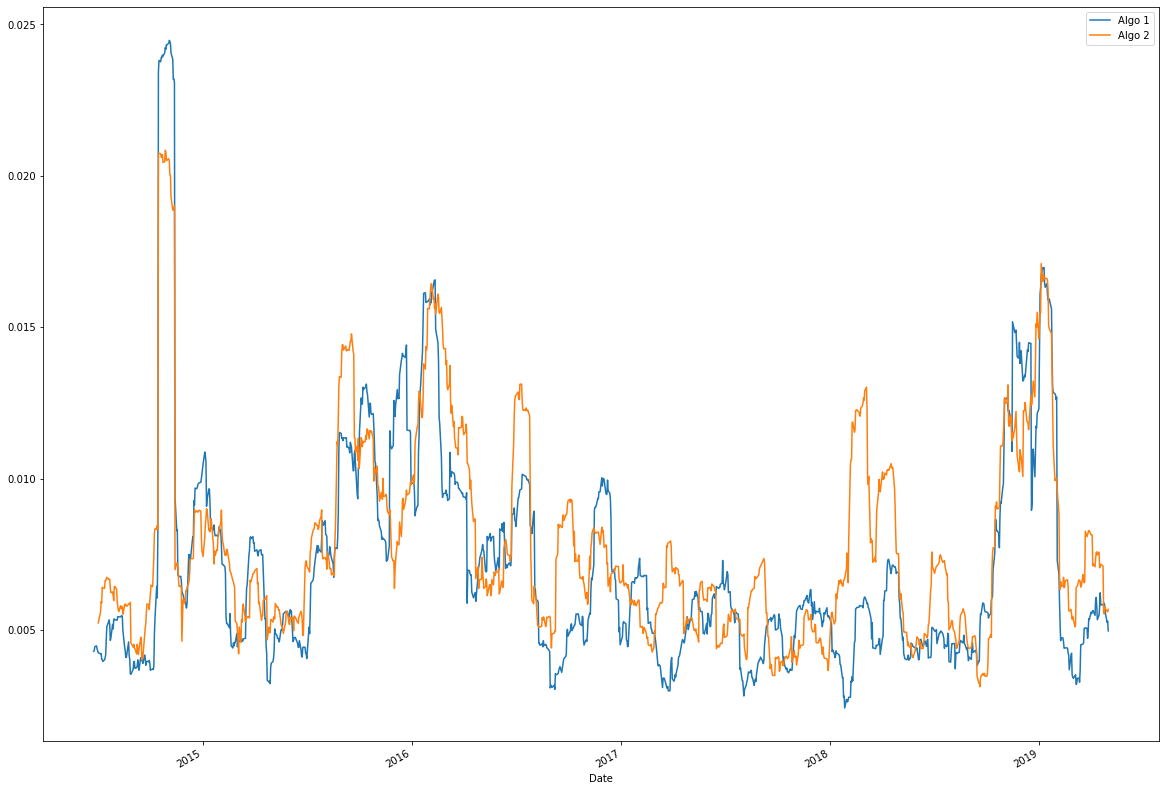

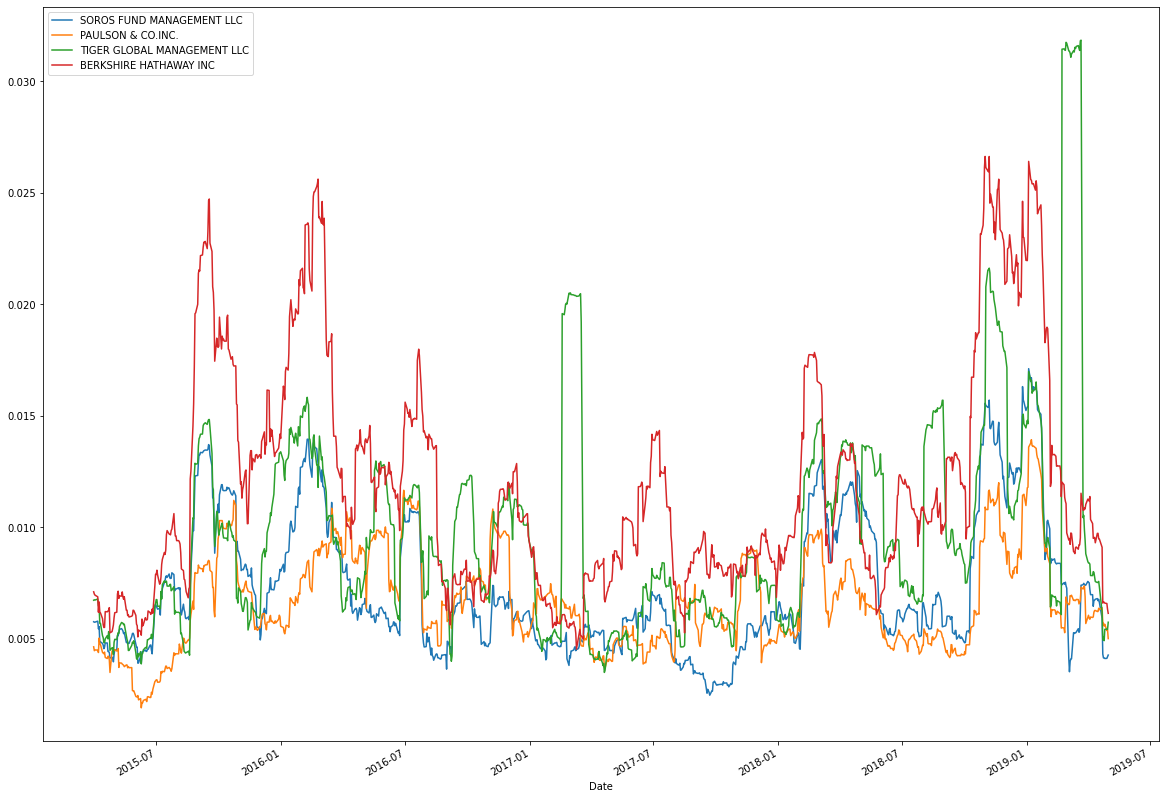

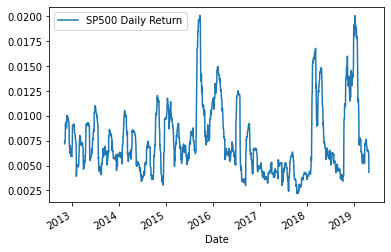

In [47]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
algo_rolling_21 = algo_df.rolling(window=21).std()
whale_rolling_21 = whale_df.rolling(window=21).std()
sp500_rolling_21 = sp500_daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
(algo_rolling_21.plot(figsize = (20,15)),whale_rolling_21.plot(figsize = (20,15)),sp500_rolling_21.plot())

### Calculate and plot the correlation

In [48]:
# Calculate the correlation
correlation = cumulative_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500 Daily Return,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,-0.653129,0.327728,0.898896,0.875512,0.470156,0.915163
PAULSON & CO.INC.,-0.653129,1.000000,-0.193595,-0.780559,-0.853201,-0.830635,-0.767196
TIGER GLOBAL MANAGEMENT LLC,0.327728,-0.193595,1.000000,0.031632,0.131595,0.052669,0.177653
BERKSHIRE HATHAWAY INC,0.898896,-0.780559,0.031632,1.000000,0.938546,0.579663,0.945500
SP500 Daily Return,0.875512,-0.853201,0.131595,0.938546,1.000000,0.740215,0.965884
Algo 1,0.470156,-0.830635,0.052669,0.579663,0.740215,1.000000,0.588982
Algo 2,0.915163,-0.767196,0.177653,0.945500,0.965884,0.588982,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [49]:
cumulative_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC',
       'SP500 Daily Return', 'Algo 1', 'Algo 2'],
      dtype='object')

In [50]:
# Calculate covariance of a single portfolio
BRK_COV = cumulative_returns['BERKSHIRE HATHAWAY INC'].cov(cumulative_returns['SP500 Daily Return'])
BRK_COV
# Calculate variance of S&P 500
SP500_VAR = cumulative_returns['SP500 Daily Return'].var()
SP500_VAR
# Computing beta
BRK_BETA = BRK_COV / SP500_VAR
BRK_BETA
# Plot beta trend

1.5696260069590189

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Annualized Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean() * 252) / (cumulative_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      10.800652
PAULSON & CO.INC.             -22.246513
TIGER GLOBAL MANAGEMENT LLC    15.675541
BERKSHIRE HATHAWAY INC         10.488981
SP500 Daily Return             13.578149
Algo 1                         26.584386
Algo 2                         10.480419
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

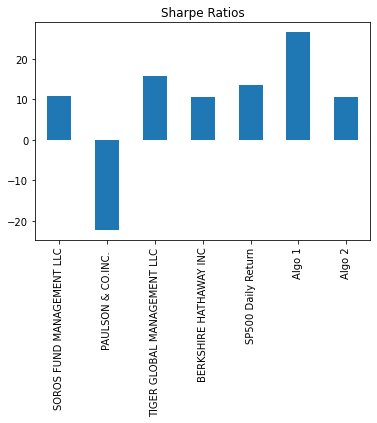

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

<AxesSubplot:title={'center':'Annual Returns'}>

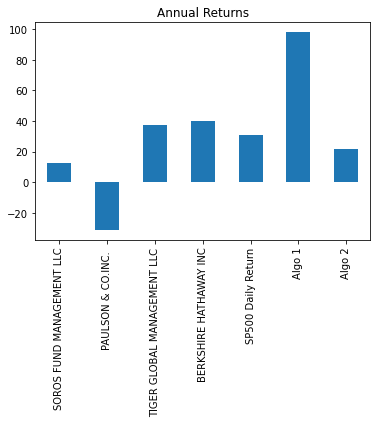

In [53]:
Annual_cumlative_returns = (cumulative_returns.mean() * 252)
Annual_cumlative_returns.plot.bar(title='Annual Returns')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

#Strategies Performance

The 'Algo 1' strategy outperformed the S&P 500 AND had less volatility than the S&P 500, meaning, the strategy had more return per unit of risk.

While Berkshire and Tiger both outperformed the S&P 500 in terms of return, to do so, they accepted more risk than the overall risk of the S&P 500.

The remaining portfolios underperformed the S&P 500 for the time period measured.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [55]:
syy_csv_path = Path("Resources/syy_data.csv")
twtr_csv_path = Path("Resources/twtr_data.csv")
yum_csv_path = Path("Resources/yum_data.csv")
syy_df = pd.read_csv(syy_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
twtr_df = pd.read_csv(twtr_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
yum_df = pd.read_csv(yum_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [56]:
# Reading data from 1st stock
syy_df.head()

,Ticker,Company,Close,Unnamed: 4,Unnamed: 5
Date,,,,,
2020-01-02,SYY,SYSCO Corporation,84.66,NaN,NaN
2020-01-03,SYY,SYSCO Corporation,84.35,NaN,NaN
2020-01-06,SYY,SYSCO Corporation,84.24,NaN,NaN
2020-01-07,SYY,SYSCO Corporation,83.56,NaN,NaN
2020-01-08,SYY,SYSCO Corporation,84.53,NaN,NaN


In [57]:
# Reading data from 2nd stock
twtr_df.head()

,Ticker,Name,Close
Date,,,
2020-01-02 16:00:00,TWTR,Twitter Inc,32.30
2020-01-03 16:00:00,TWTR,Twitter Inc,31.52
2020-01-06 16:00:00,TWTR,Twitter Inc,31.64
2020-01-07 16:00:00,TWTR,Twitter Inc,32.54
2020-01-08 16:00:00,TWTR,Twitter Inc,33.05


In [58]:
# Reading data from 3rd stock
yum_df.head()

,Ticker,Name,Close
Date,,,
2020-01-02 16:00:00,YUM,"Yum! Brands, Inc.",102.17
2020-01-03 16:00:00,YUM,"Yum! Brands, Inc.",101.85
2020-01-06 16:00:00,YUM,"Yum! Brands, Inc.",101.79
2020-01-07 16:00:00,YUM,"Yum! Brands, Inc.",101.97
2020-01-08 16:00:00,YUM,"Yum! Brands, Inc.",102.15


In [59]:
# Combine all stocks in a single DataFrame
custom_df = pd.concat([syy_df, twtr_df, yum_df], axis="rows", join="inner")
custom_df.head()
custom_df.tail()

,Ticker,Close
Date,,
2021-09-08 16:00:00,YUM,130.19
2021-09-09 16:00:00,YUM,129.25
2021-09-10 16:00:00,YUM,129.89
2021-09-13 16:00:00,YUM,129.05
2021-09-14 16:00:00,YUM,128.99


In [60]:
# Reset Date index
custom_df.reset_index(inplace=True)
custom_df

,Date,Ticker,Close
0,2020-01-02 00:00:00,SYY,84.66
1,2020-01-03 00:00:00,SYY,84.35
2,2020-01-06 00:00:00,SYY,84.24
3,2020-01-07 00:00:00,SYY,83.56
4,2020-01-08 00:00:00,SYY,84.53
...,...,...,...
1281,2021-09-08 16:00:00,YUM,130.19
1282,2021-09-09 16:00:00,YUM,129.25
1283,2021-09-10 16:00:00,YUM,129.89
1284,2021-09-13 16:00:00,YUM,129.05


In [61]:
# Reorganize portfolio data by having a column per symbol
reorg_data = Path("Resources/hard_way.csv")
reorg_df = pd.read_csv(reorg_data, index_col='DATE', infer_datetime_format=True, parse_dates=True)
reorg_df.head()

,SYY,TWTR,YUM
DATE,,,
2020-01-02,84.66,32.30,102.17
2020-01-03,84.35,31.52,101.85
2020-01-06,84.24,31.64,101.79
2020-01-07,83.56,32.54,101.97
2020-01-08,84.53,33.05,102.15


Got hung up on the Pivot because of the Time in the Date column that I couldn't seem to get rid of, so I ended up working off of another cheater flat file.

In [62]:
reorg_data_pivot = custom_df.pivot_table(values="Close", index="Date", columns="Ticker")
reorg_data_pivot

Ticker,SYY,TWTR,YUM
Date,,,
2020-01-02 00:00:00,84.66,NaN,NaN
2020-01-02 16:00:00,NaN,32.30,102.17
2020-01-03 00:00:00,84.35,NaN,NaN
2020-01-03 16:00:00,NaN,31.52,101.85
2020-01-06 00:00:00,84.24,NaN,NaN
...,...,...,...
2021-09-10 00:00:00,76.56,NaN,NaN
2021-09-10 16:00:00,NaN,61.56,129.89
2021-09-13 00:00:00,76.87,NaN,NaN


In [87]:
# Calculate daily returns
reorg_returns = reorg_df.pct_change()
# Drop NAs
reorg_returns.dropna(inplace=True)
# Display sample data
reorg_returns.head()

,SYY,TWTR,YUM
DATE,,,
2020-01-03,-0.003662,-0.024149,-0.003132
2020-01-06,-0.001304,0.003807,-0.000589
2020-01-07,-0.008072,0.028445,0.001768
2020-01-08,0.011608,0.015673,0.001765
2020-01-09,0.001183,0.005144,0.007930


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [88]:
print(type(reorg_returns))

<class 'pandas.core.frame.DataFrame'>


In [89]:
# Set weights
weights = [1/3, 1/3, 1/3]
syy_weight = (1/3)
twtr_weight = (1/3)
yum_weight = (1/3)
# Calculate portfolio return
portfolio_returns = syy_weight * reorg_returns["SYY"] + twtr_weight * reorg_returns["TWTR"] + yum_weight * reorg_returns["YUM"]
# Display sample data
#portfolio_returns_df = pd.DataFrame(portfolio_returns, index='DATE')
#portfolio_returns_df.set_index('DATE')
portfolio_returns.dtypes
type(portfolio_returns)

pandas.core.series.Series

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [91]:
# Join your returns DataFrame to the original returns DataFrame
#portfolio_returns_df = pd.DataFrame(portfolio_returns)
#portfolio_returns_df.to_csv("portfolio_returns.csv")
reorg_returns['Portfolio Returns'] = portfolio_returns
reorg_returns


,SYY,TWTR,YUM,Portfolio Returns
DATE,,,,
2020-01-03,-0.003662,-0.024149,-0.003132,-0.010314
2020-01-06,-0.001304,0.003807,-0.000589,0.000638
2020-01-07,-0.008072,0.028445,0.001768,0.007380
2020-01-08,0.011608,0.015673,0.001765,0.009682
2020-01-09,0.001183,0.005144,0.007930,0.004752
...,...,...,...,...
2021-09-07,-0.002715,0.004949,-0.015964,-0.004577
2021-09-08,-0.009463,-0.041705,0.010557,-0.013537
2021-09-09,0.020416,0.003051,-0.007220,0.005416


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [93]:
# Calculate the annualized `std`
reorg_returns.std()

SYY                  0.035330
TWTR                 0.035094
YUM                  0.022714
Portfolio Returns    0.024894
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='DATE'>

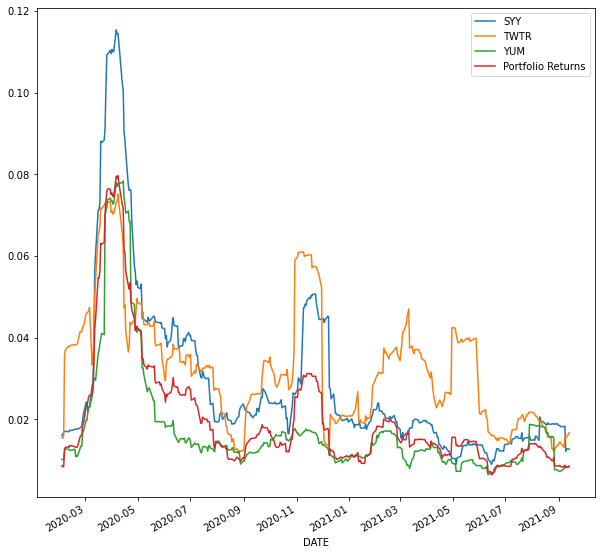

In [97]:
# Calculate rolling standard deviation
reorg_returns.rolling(window=21).std()
# Plot rolling standard deviation
reorg_returns.rolling(window=21).std().plot(figsize = (10,10))

### Calculate and plot the correlation

                        SYY      TWTR       YUM  Portfolio Returns
SYY                1.000000  0.410178  0.593028           0.846188
TWTR               0.410178  1.000000  0.384336           0.780851
YUM                0.593028  0.384336  1.000000           0.765292
Portfolio Returns  0.846188  0.780851  0.765292           1.000000


<AxesSubplot:>

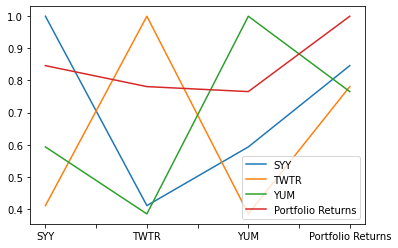

In [102]:
# Calculate and plot the correlation
reorg_correlation = reorg_returns.corr()
print(reorg_correlation)
reorg_correlation.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!